In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cv2
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = '/content/drive/My Drive/Colab Notebooks/Image Classification/seg_train/seg_train'
test_dir = '/content/drive/My Drive/Colab Notebooks/Image Classification/seg_test/seg_test'

In [134]:
datagen=ImageDataGenerator(rescale=1.0/255.0, validation_split=0.25)

train_data = datagen.flow_from_directory( train_dir, classes=['buildings','forest','glacier','mountain','sea','street'],  subset="training", target_size=(150, 150), batch_size=16, seed = 0)
valid_data = datagen.flow_from_directory(train_dir, classes=['buildings','forest','glacier','mountain','sea','street'],  subset="validation", target_size=(150, 150), batch_size=16, seed = 0)

Found 10528 images belonging to 6 classes.
Found 3506 images belonging to 6 classes.


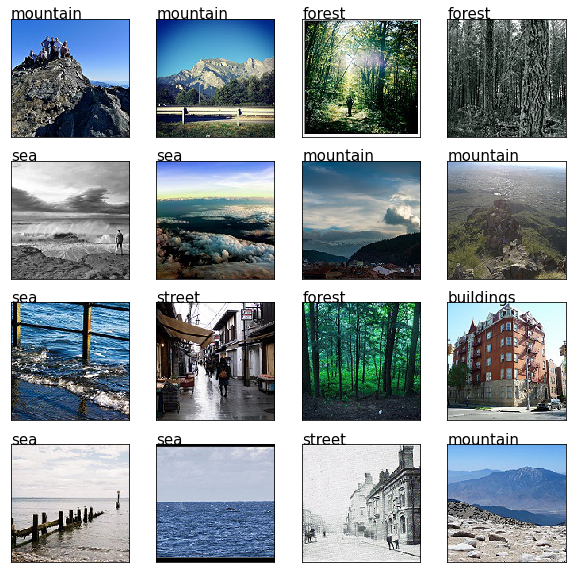

In [142]:
labels_dict = {0:'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'}

imgs, labels = next(train_data)
img = np.array(imgs*255).astype(np.uint8)
fig, ax = plt.subplots(4, 4, figsize=(10, 10))
i=0
for row in ax:
  for col in row:
    col.imshow(img[i], interpolation="nearest")
    col.text(0,0,labels_dict[np.where(labels[i] == 1)[0][0]],fontsize=15)
    col.set_xticks(())
    col.set_yticks(())
    i+=1

plt.show()

In [143]:
model = keras.Sequential([
                          keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=(150,150,3)),
                          keras.layers.Conv2D(32, (3, 3), activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers.Dropout(0.25),
                          keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
                          keras.layers.Conv2D(64, (3, 3), activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers.Dropout(0.25),
                          keras.layers.Flatten(),
                          keras.layers.Dense(512, activation='relu'),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(6, activation='softmax')])

model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [144]:
STEP_SIZE_TRAIN=train_data.n//train_data.batch_size
STEP_SIZE_VALID=valid_data.n//valid_data.batch_size
model.fit_generator(generator=train_data,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_data,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
658/658 [==============================] - 8139s 12s/step - loss: 1.0097 - accuracy: 0.6148 - val_loss: 0.6663 - val_accuracy: 0.7620
Epoch 2/10
658/658 [==============================] - 1211s 2s/step - loss: 0.6699 - accuracy: 0.7520 - val_loss: 0.5338 - val_accuracy: 0.8102
Epoch 3/10
658/658 [==============================] - 1209s 2s/step - loss: 0.5133 - accuracy: 0.8166 - val_loss: 0.5495 - val_accuracy: 0.8099
Epoch 4/10
658/658 [==============================] - 1201s 2s/step - loss: 0.3939 - accuracy: 0.8599 - val_loss: 0.5370 - val_accuracy: 0.8262
Epoch 5/10
658/658 [==============================] - 1202s 2s/step - loss: 0.3003 - accuracy: 0.8956 - val_loss: 0.5803 - val_accuracy: 0.8131
Epoch 6/10
658/658 [==============================] - 1212s 2s/step - loss: 0.2296 - accuracy: 0.9258 - val_loss: 0.7067 - val_accuracy: 0.8174
Epoch 7/10
658/658 [==============================] - 1200s

In [149]:
datagen=ImageDataGenerator(rescale=1.0/255.0)
test_data = datagen.flow_from_directory(test_dir, classes=['buildings','forest','glacier','mountain','sea','street'], target_size=(150, 150), batch_size=32, seed = 0)

Found 3000 images belonging to 6 classes.


In [150]:
test_loss, test_acc = model.evaluate(test_data, verbose = 1)

94/94 [==============================] - 1737s 18s/step - loss: 0.7910 - accuracy: 0.8200


In [190]:
pred_dir = '/content/drive/My Drive/Colab Notebooks/Image Classification/seg_pred/seg_pred/'

datagen=ImageDataGenerator(rescale=1.0/255.0)
pred_data = datagen.flow_from_directory(pred_dir, target_size=(150, 150))

imgs, labels = next(pred_data)

Found 12 images belonging to 1 classes.


In [191]:
predictions = model.predict(x=imgs, steps=len(pred_data), verbose=0)

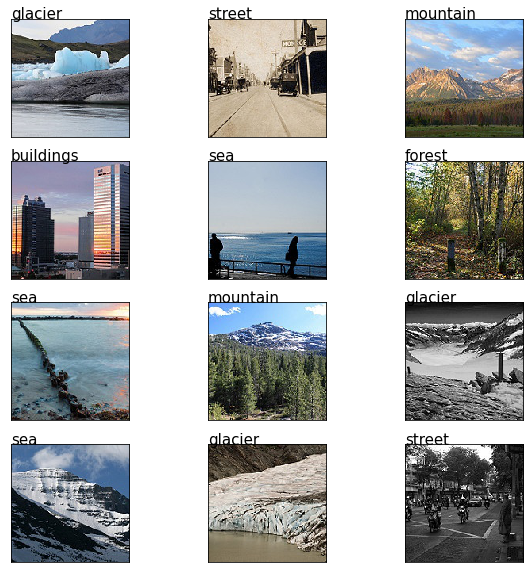

In [192]:
img = np.array(imgs*255).astype(np.uint8)
fig, ax = plt.subplots(4, 3, figsize=(10, 10))
i=0
for row in ax:
  for col in row:
    col.imshow(img[i], interpolation="nearest")
    col.text(0,0,labels_dict[np.argmax(predictions[i])],fontsize=15)
    col.set_xticks(())
    col.set_yticks(())
    i+=1

plt.show()

In [189]:
imgs, labels = next(pred_data)
imgs[0][0]
pred_data